### Reducing Traffic Mortality In USA

In [20]:
# Importing the `pandas` module as "pd"
import pandas as pd

# Reading in `road-accidents.csv`
car_acc = pd.read_csv('datasets/road-accidents.csv', comment='#', sep='|')

# Saving the number of rows columns as a tuple
rows_and_cols = car_acc.shape
print('There are {} rows and {} columns.\n'.format(
    rows_and_cols[0], rows_and_cols[1]))

There are 51 rows and 5 columns.



In [21]:
# Generating an overview of the DataFrame
car_acc_information = car_acc.info()
print(car_acc_information)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                   51 non-null object
drvr_fatl_col_bmiles    51 non-null float64
perc_fatl_speed         51 non-null int64
perc_fatl_alcohol       51 non-null int64
perc_fatl_1st_time      51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
None


In [22]:
# Displaying the last five rows of the DataFrame
car_acc.tail()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
46,Virginia,12.7,19,27,88
47,Washington,10.6,42,33,86
48,West Virginia,23.8,34,28,87
49,Wisconsin,13.8,36,33,84
50,Wyoming,17.4,42,32,90


In [23]:
# Importing seaborn and make plots appear inline
import seaborn as sns
%matplotlib inline

# Computing the summary statistics of all columns in the `car_acc` DataFrame
sum_stat_car = car_acc.describe()
print(sum_stat_car)

       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time  
count            51.00000  
mean             88.72549  
std               6.96011  
min              76.00000  
25%              83.50000  
50%              88.00000  
75%              95.00000  
max             100.00000  


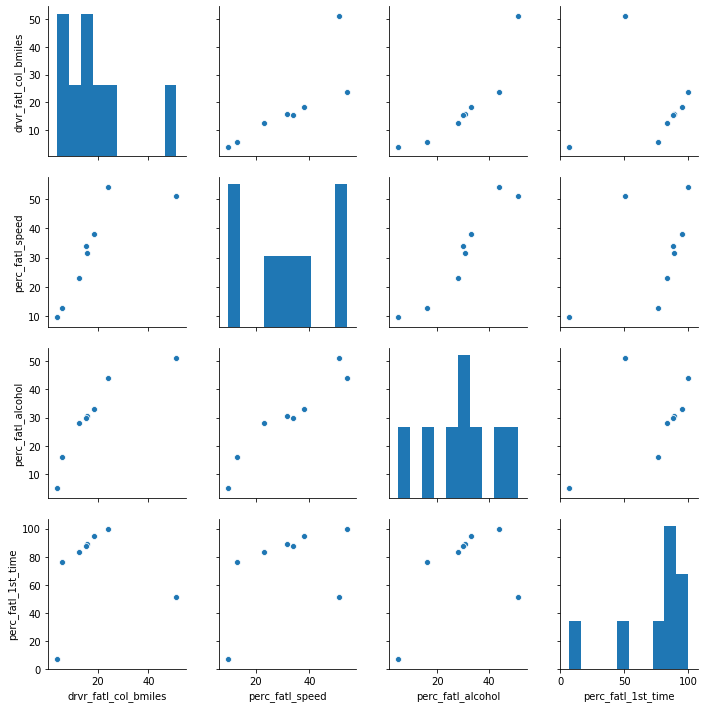

In [24]:
# Creating a pairwise scatter plot to explore the data
sns.pairplot(sum_stat_car)

In [25]:
# Computing the correlation coefficent for all column pairs
corr_columns = car_acc.corr()
corr_columns

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


In [26]:
# Importing the linear model function from sklearn
from sklearn import linear_model

# Creating the features and target DataFrames
features = car_acc.drop(['state', 'drvr_fatl_col_bmiles'], axis=1)
target = car_acc['drvr_fatl_col_bmiles']

# Creating a linear regression object
reg = linear_model.LinearRegression()

# Fitting a multivariate linear regression model
reg.fit(features, target)

# Retrieving the regression coefficients
fit_coef = reg.coef_
fit_coef

array([-0.04180041,  0.19086404,  0.02473301])

The cumulative variance of the first two principal components is 0.7947


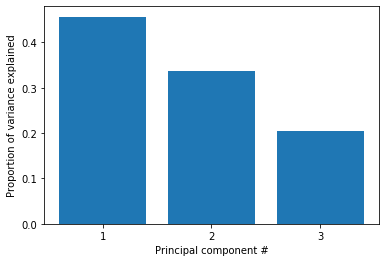

In [27]:
# Standardizing and center the feature columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Importing the PCA class function from sklearn
from sklearn.decomposition import PCA
pca = PCA()

# Fitting the standardized data to the pca
pca.fit(features_scaled)

# Plotting the proportion of variance explained on the y-axis of the bar plot
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

# Computing the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[1]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

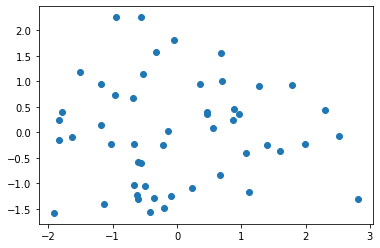

In [28]:
# Transforming the scaled features using two principal components
pca = PCA(n_components=2)
p_comps = pca.fit_transform(features_scaled)

# Extracting the first and second component to use for the scatter plot
p_comp1 = p_comps[:, 0]
p_comp2 = p_comps[:, 1]

# Plotting the first two principal components in a scatter plot
plt.scatter(p_comp1, p_comp2);

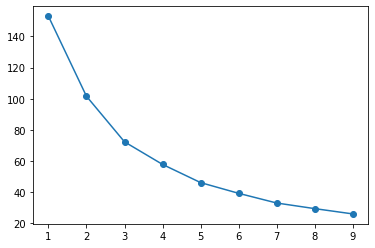

In [29]:
# Importing KMeans from sklearn
from sklearn.cluster import KMeans

# A loop is used to plot the explanatory power for up to 10 KMeans clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Initializing the KMeans object using the current number of clusters (k)
    km = KMeans(n_clusters=k, random_state=8)
    # Fitting the scaled features to the KMeans object
    km.fit(features_scaled)
    # Appending the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)
    
# Plotting the results in a line plot
plt.plot(ks, inertias, marker='o');

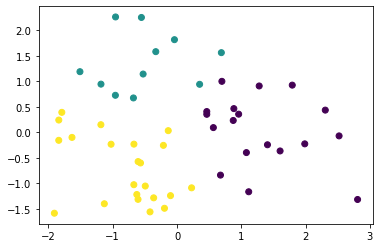

In [30]:
# Creating a KMeans object with 3 clusters, use random_state=8 
km = KMeans(n_clusters=3, random_state=8)

# Fitting the data to the `km` object
km.fit(features_scaled)

# Creating a scatter plot of the first two principal components
# and color it according to the KMeans cluster assignment 
plt.scatter(p_comp1, p_comp2, c=km.labels_);

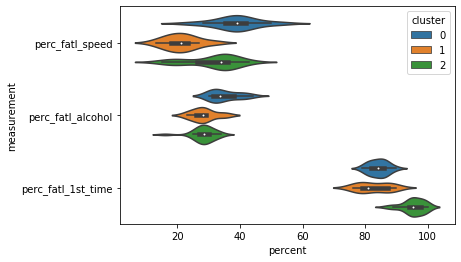

In [31]:
# Creating a new column with the labels from the KMeans clustering
car_acc['cluster'] = km.labels_

# Reshaping the DataFrame to the long format
melt_car = pd.melt(car_acc, id_vars="cluster", var_name="measurement", value_name="percent", value_vars=features)

# Creating a violin plot splitting and coloring the results according to the km-clusters
sns.violinplot(x=melt_car["percent"], y=melt_car["measurement"], hue=melt_car["cluster"]);

,count,mean,sum
cluster,,,
0,18,911.406439,16405.3159
1,11,860.505945,9465.5654
2,22,898.378595,19764.3291


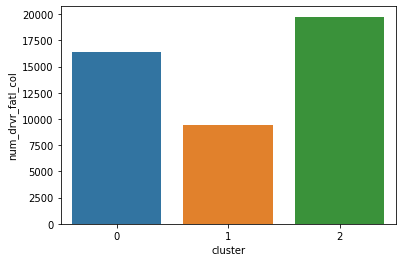

In [32]:
# Reading in the new dataset
miles_driven = pd.read_csv('datasets/miles-driven.csv', sep='|')

# Merge the `car_acc` DataFrame with the `miles_driven` DataFrame
car_acc_miles = pd.merge(car_acc, miles_driven, on='state')

# Create a new column for the number of drivers involved in fatal accidents
car_acc_miles['num_drvr_fatl_col'] = car_acc_miles['drvr_fatl_col_bmiles'] * car_acc_miles['million_miles_annually'] / 1000

# Create a barplot of the total number of accidents per cluster
sns.barplot(x='cluster', y='num_drvr_fatl_col', data=car_acc_miles, estimator=sum, ci=None)

# Calculate the number of states in each cluster and their 'num_drvr_fatl_col' mean and sum.
count_mean_sum = car_acc_miles.groupby('cluster')['num_drvr_fatl_col'].agg(['count', 'mean', 'sum'])
count_mean_sum

In [33]:
# Which cluster would you choose?
cluster_num = 1